# Machine Learning
### Single-linkage clustering
**Single-linkage clustering** is an **agglomerative hierarchical** clustering that defines the distance between two clusters as the shortest distance between any pair of points—one from each cluster. 
- In other words, two clusters are considered "close" if at least one point in the first cluster is very near to at least one point in the second cluster. 

Thus, we may express single-linkage clustering as:
1. Start with each data point as its own cluster.
2. Repeatedly merge the two clusters that are closest, where "closest" means the minimum pairwise distance between any two points in the respective clusters.
3. Continue merging until the desired number of clusters remains (or until all points are in one cluster).

<hr>

Key characteristics of **single-linkage clustering**: 
- **Chaining effect:** Because it only considers the nearest pair, single-linkage tends to produce long, chain-like clusters, even linking clusters that are mostly far apart but connected by a few nearby points.
- Sensitive to **noise** and **outliers**: A single outlier close to another cluster can cause unintended merging.
- Works well for clusters that are **elongated** or **irregularly shaped**, but performs poorly when clusters are **compact** and **overlapping** (like the versicolor and virginica classes in the Iris dataset).
     
<hr>

In the following, we implement single-linkage clustering by the **Kruskal's algorithm** for **minimum spanning tree**. Essentially, Kruskal's algorithm and single-linkage clustering are the same. We already talked about `Kruskal's algorithm` in repository **Graph-Analysis**.
<br> We first test the single-linkage clustering (Kruskal-based clustering) with two toy datasets. Then, we use the **iris dataset** for working with the clustering algorithm. 
<hr>

**Hint:** Under single-linkage clustering, even a few nearby points between **Versicolor** and **Virginica** in iris cause the entire groups to merge early.
<hr>

<br>**Reminder:** In the Iris dataset, we have three classes: Setosa, Versicolor, and Virginica.
- **Setosa** is well-separated from the other two classes.
- **Versicolor** and **Virginica** overlap significantly in the 4D feature space.

     
     
<hr>
https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/Data-Visualization

In [2]:
# Import required modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Define UnionFind class
class UnionFind:
    def __init__(self, n):
        self.parent = np.arange(n)
        self.rank = np.zeros(n, dtype=int)
        self.num_clusters = n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx == ry:
            return False
        if self.rank[rx] < self.rank[ry]:
            self.parent[rx] = ry
        elif self.rank[rx] > self.rank[ry]:
            self.parent[ry] = rx
        else:
            self.parent[ry] = rx
            self.rank[rx] += 1
        self.num_clusters -= 1
        return True

In [4]:
# Define single-linkage clustering with Kruskal's
def kruskal_clustering(points, k):
    """
    Single-linkage clustering using Kruskal's algorithm.
    
    Parameters:
        points : array-like, shape (n_samples, n_features)
            Input data points.
        k : int
            Number of clusters (1 <= k <= n_samples)
    
    Returns:
        labels : np.ndarray, shape (n_samples,)
            Cluster labels (integers from 0 to k-1).
    """
    points = np.asarray(points)
    n = points.shape[0]
    
    if not (1 <= k <= n):
        raise ValueError("k must be between 1 and number of points")

    if k == n:
        return np.arange(n)
    if k == 1:
        return np.zeros(n, dtype=int)

    # Compute all pairwise squared distances (to avoid sqrt until needed)
    # But for clarity, we'll compute full distances
    edges = []
    for i in range(n):
        # Vectorized distance from point i to all j > i
        diffs = points[i + 1:] - points[i]
        dists = np.linalg.norm(diffs, axis=1)
        for j, d in enumerate(dists, start=i + 1):
            edges.append((d, i, j))
    
    # Sort by distance
    edges.sort(key=lambda x: x[0])

    # Kruskal's algorithm
    uf = UnionFind(n)
    for dist, i, j in edges:
        if uf.num_clusters == k:
            break
        uf.union(i, j)

    # Assign final labels
    roots = np.array([uf.find(i) for i in range(n)])
    _, labels = np.unique(roots, return_inverse=True)
    return labels

In [5]:
# Simple 2D example
points = np.array([
    [0, 0],
    [1, 1],
    [2, 2],
    [10, 10],
    [11, 11] ])

# Cluster points into two clusters
labels = kruskal_clustering(points, k=2)

# Print points and their assigned clusters
print('--- Data points and assigned clusters ---')
for point,label in zip(points,labels):
    print(f'point={point}, cluster={label}')

--- Data points and assigned clusters ---
point=[0 0], cluster=0
point=[1 1], cluster=0
point=[2 2], cluster=0
point=[10 10], cluster=1
point=[11 11], cluster=1


Cluster 0 with 10 samples
Cluster 1 with 10 samples
Cluster 2 with 10 samples


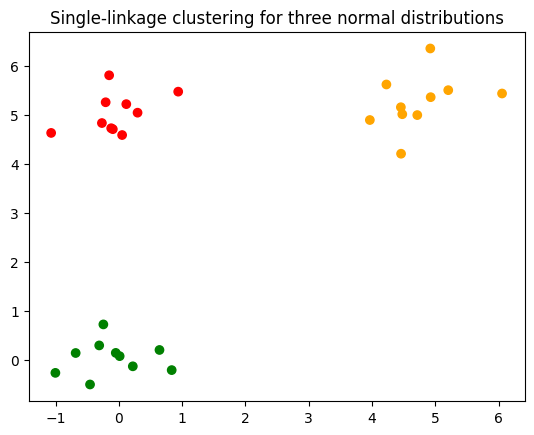

In [6]:
# Example of three normal distributions
# Three clear clusters
cluster1 = np.random.normal([0, 0], 0.5, (10, 2))
cluster2 = np.random.normal([5, 5], 0.5, (10, 2))  
cluster3 = np.random.normal([0, 5], 0.5, (10, 2))

points3 = np.vstack([cluster1, cluster2, cluster3])
n_points3 = len(points3)
#--------
colors3=np.array(['green','orange','red'])
labels3 = kruskal_clustering(points3, k=3)
clusters3, nsamples3=np.unique(labels3,return_counts=True)
for cluster, sample in zip(clusters3,nsamples3):
    print(f'Cluster {cluster} with {sample} samples')
plt.scatter(points3[:,0],points3[:,1],c=colors3[labels3])
plt.title('Single-linkage clustering for three normal distributions')
plt.show()

# Downloading Iris dataset to test our single-linkage clustering

In [7]:
# Downlaod the iris dataset into a panda dataframe
df=pd.read_csv("https://raw.githubusercontent.com/ostad-ai/Machine-Learning/refs/heads/main/iris.csv")    

In [8]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Issue with single-linkage clustering
Here, we use the **iris** dataset and show that **single-linkage** clustering fails to separate **overlapping** clusters.
- In other words, single-linkage clustering cannot recover three clusters in the Iris dataset due to the overlap between **versicolor** and **virginica**.

In [9]:
# Example with iris data set
# Get the feature vectors in rows
xs=df.values[:,:4].astype('float')

# Ask the Kruskal clustering to cluster into three
labels_iris = kruskal_clustering(xs, k=3)
# Add a column Cluster to df for cluster labels
df["Cluster"]=labels_iris
# See two clusters have merged into one
print('---Clustering of Iris into three clusters---')
print('No. of samples in each cluster:')
clusters, nsamples=np.unique(labels_iris,return_counts=True)
for cluster, sample in zip(clusters,nsamples):
    print(f'Cluster {cluster} with {sample} samples')

---Clustering of Iris into three clusters---
No. of samples in each cluster:
Cluster 0 with 50 samples
Cluster 1 with 98 samples
Cluster 2 with 2 samples


# Single-linkage clustering of scikit-learn

In [10]:
# For double-checking, uncomment the code below to see
# the results from Scikit-learn single-linkage clustering
# for iris dataset
#---------------------------------
# from sklearn.datasets import load_iris
# from scipy.cluster.hierarchy import linkage, fcluster

# iris = load_iris()
# X = iris.data
# Z = linkage(X, method='single')
# labels2 = fcluster(Z, t=3, criterion='maxclust')  # force 3 clusters
# print(np.unique(labels2, return_counts=True))
# # only 2 clusters effectively used!